In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

Customer ID: A unique identifier for each customer
Surname: The customer's surname or last name
Credit Score: A numerical value representing the customer's credit score
Geography: The country where the customer resides (France, Spain or Germany)
Gender: The customer's gender (Male or Female)
Age: The customer's age.
Tenure: The number of years the customer has been with the bank
Balance: The customer's account balance
NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
EstimatedSalary: The estimated salary of the customer
Exited: Whether the customer has churned (1 = yes, 0 = no)

In [3]:
data=pd.read_csv('Churn_Modelling.csv')

In [4]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [7]:
data.drop('RowNumber',axis=1,inplace=True)

In [8]:
data.drop('Surname',axis=1,inplace=True)

<AxesSubplot:xlabel='Exited', ylabel='count'>

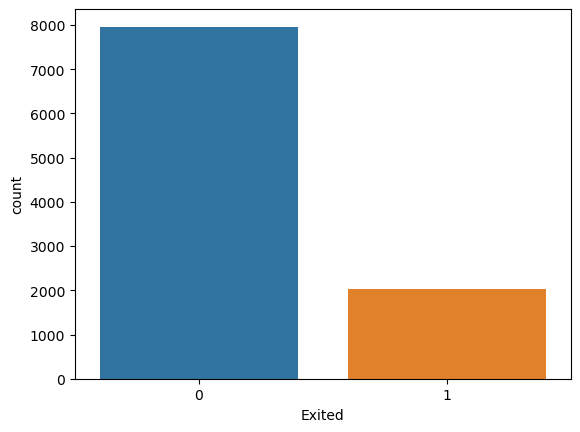

In [9]:
sns.countplot(data=data,x=data['Exited'])

In [10]:
import plotly.express as px
fig = px.bar(data, x="Age", y='Exited', color="Exited", title="Age Vs Exited")
fig.show()

In [11]:
import plotly.express as px

fig = px.histogram(data, x="Geography",
             color='Exited', barmode='group',
             height=400)
fig.show()

In [12]:
import plotly.express as px

fig = px.histogram(data, x="Gender",
             color='Exited', barmode='group',
             height=400,pattern_shape="Exited", pattern_shape_sequence=["x", "+"])
fig.show()

In [13]:
import plotly.express as px

fig = px.histogram(data, x="NumOfProducts",
             color='Exited', barmode='group',
             height=400,pattern_shape="Exited", pattern_shape_sequence=["x", "+"])
fig.show()

In [14]:
import plotly.express as px

fig = px.histogram(data, x="NumOfProducts",
             color='Exited', barmode='group',
             height=400,pattern_shape="Exited", pattern_shape_sequence=["x", "+"])
fig.show()

In [15]:


import plotly.express as px

fig = px.histogram(data, x="HasCrCard",
             color='Exited', barmode='group',
             height=400,pattern_shape="Exited", pattern_shape_sequence=["x", "+"])
fig.show()

In [16]:
import plotly.express as px

fig = px.histogram(data, x="IsActiveMember",
             color='Exited', barmode='group',
             height=400,pattern_shape="Exited", pattern_shape_sequence=["x", "+"])
fig.show()

In [17]:
import plotly.express as px

fig = px.histogram(data, x="Age",
             color='Exited', barmode='group',
             height=400,pattern_shape="Exited", pattern_shape_sequence=["x", "+"])
fig.show()

In [18]:
import plotly.express as px

fig = px.histogram(data, x="EstimatedSalary",
             color='Exited', barmode='group',
             height=400,pattern_shape="Exited", pattern_shape_sequence=["x", "+"])
fig.show()

In [19]:
data['Gender']=data['Gender'].replace(['Female','Male'],[0,1])

In [20]:
selected_column

NameError: name 'selected_column' is not defined

In [23]:
from sklearn.preprocessing import LabelEncoder

In [22]:
label=LabelEncoder()

In [24]:
data['Geography']=label.fit_transform(data['Geography'])

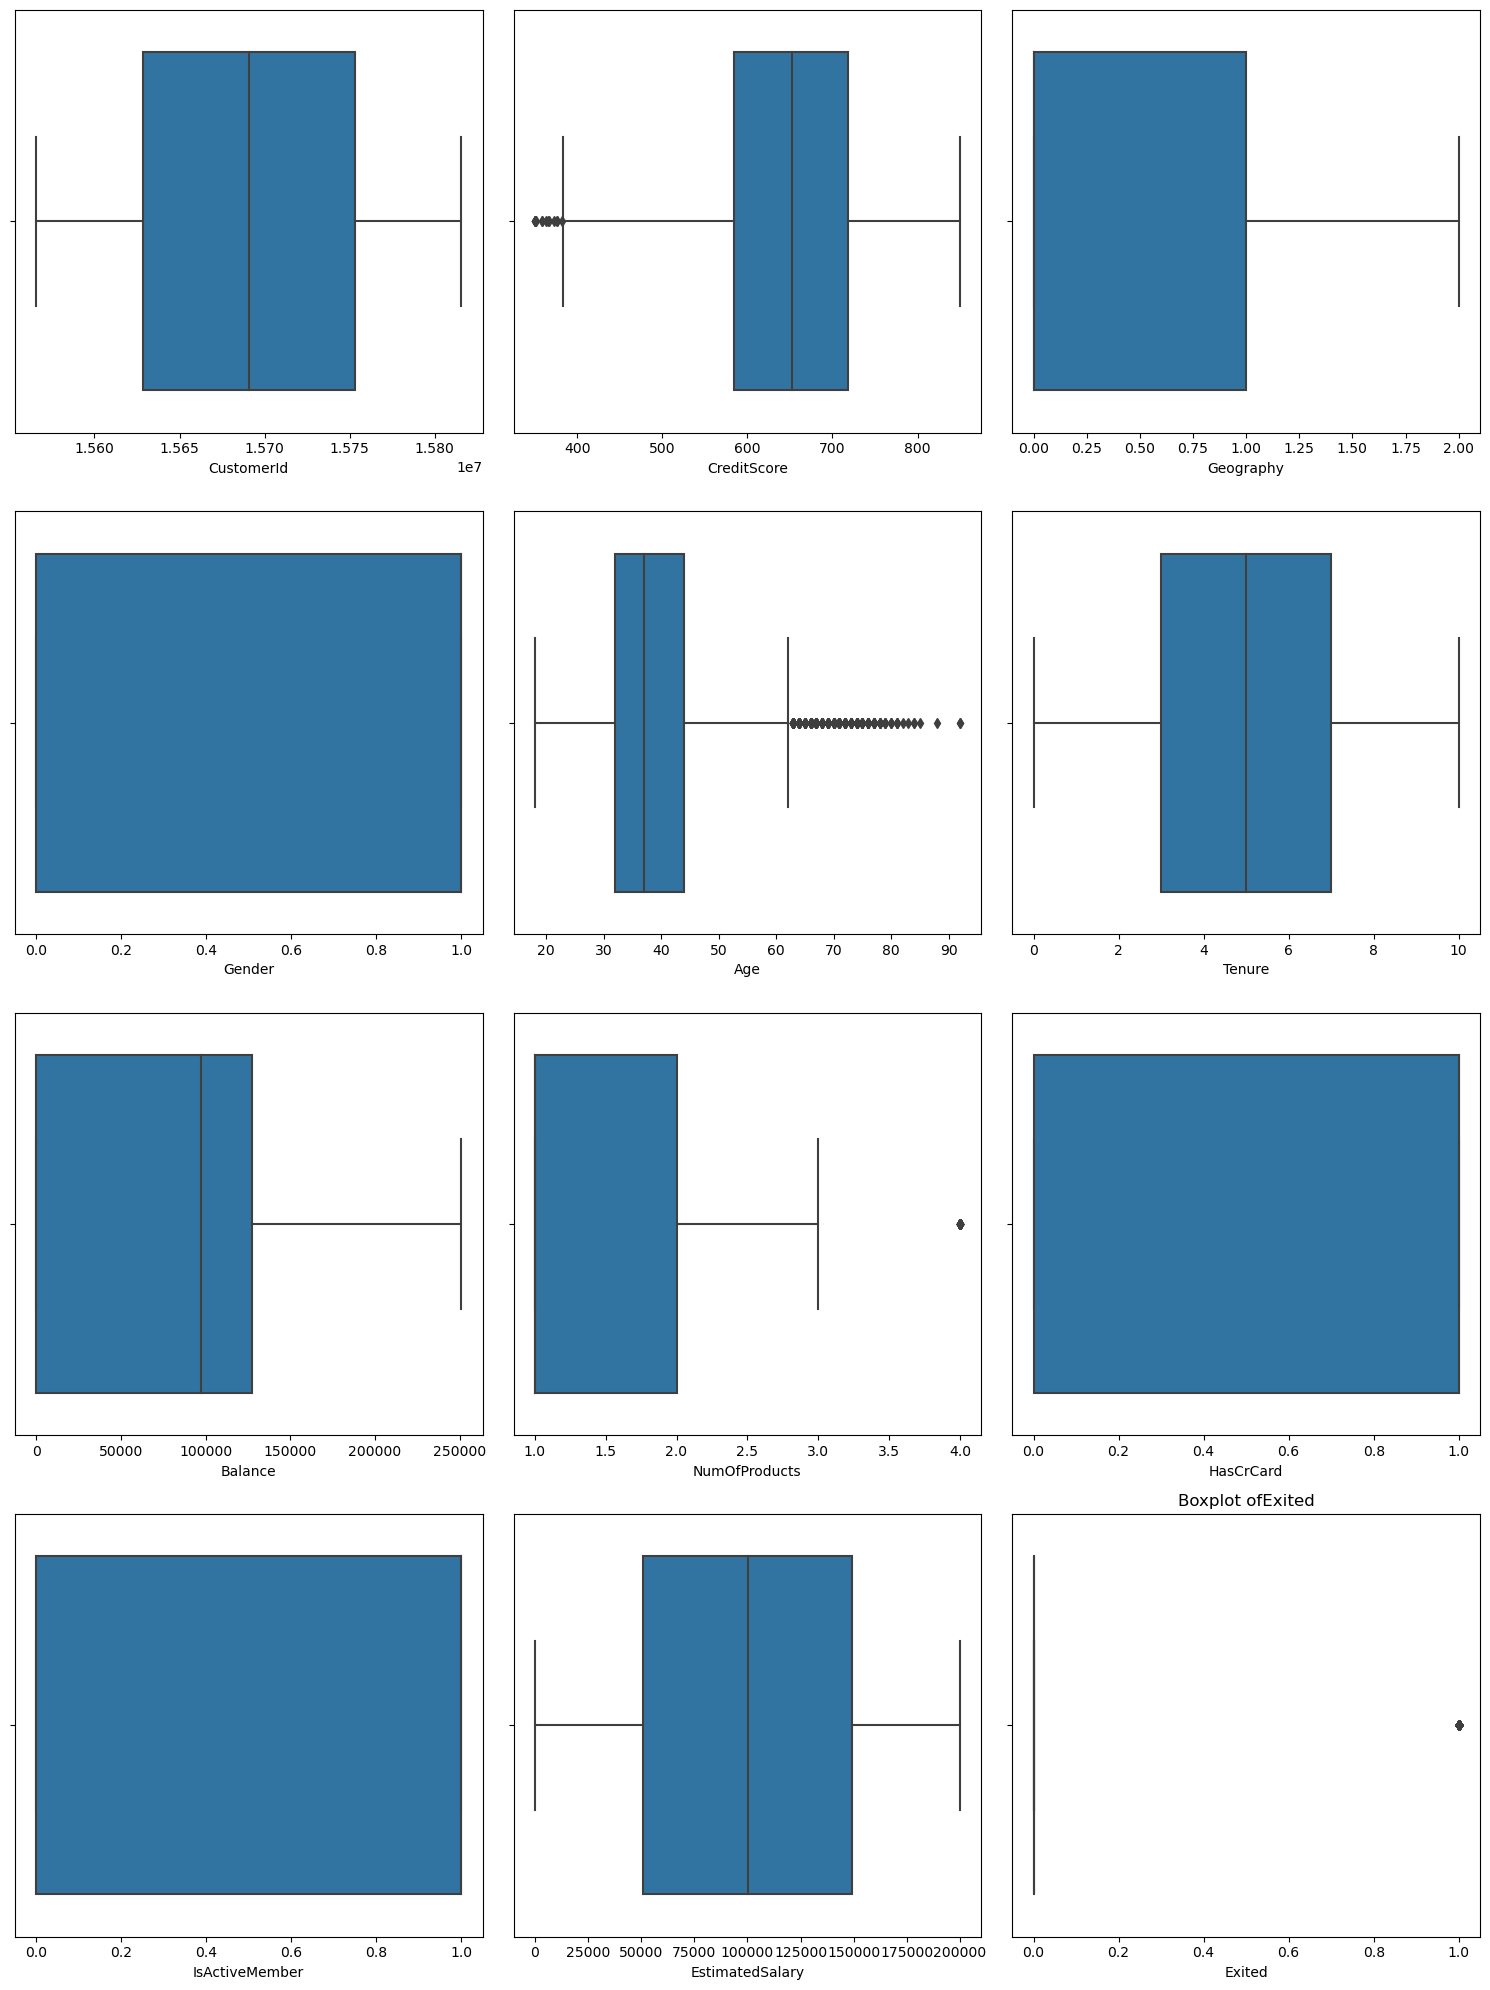

In [25]:
selected_column=data.columns

fig,axes=plt.subplots(nrows=4,ncols=3,figsize=(15,20))
axes=axes.flatten()

for i , column in enumerate(selected_column):
    sns.boxplot(x=data[column],ax=axes[i])
    plt.title(f"Boxplot of{column}")
plt.tight_layout()

<AxesSubplot:>

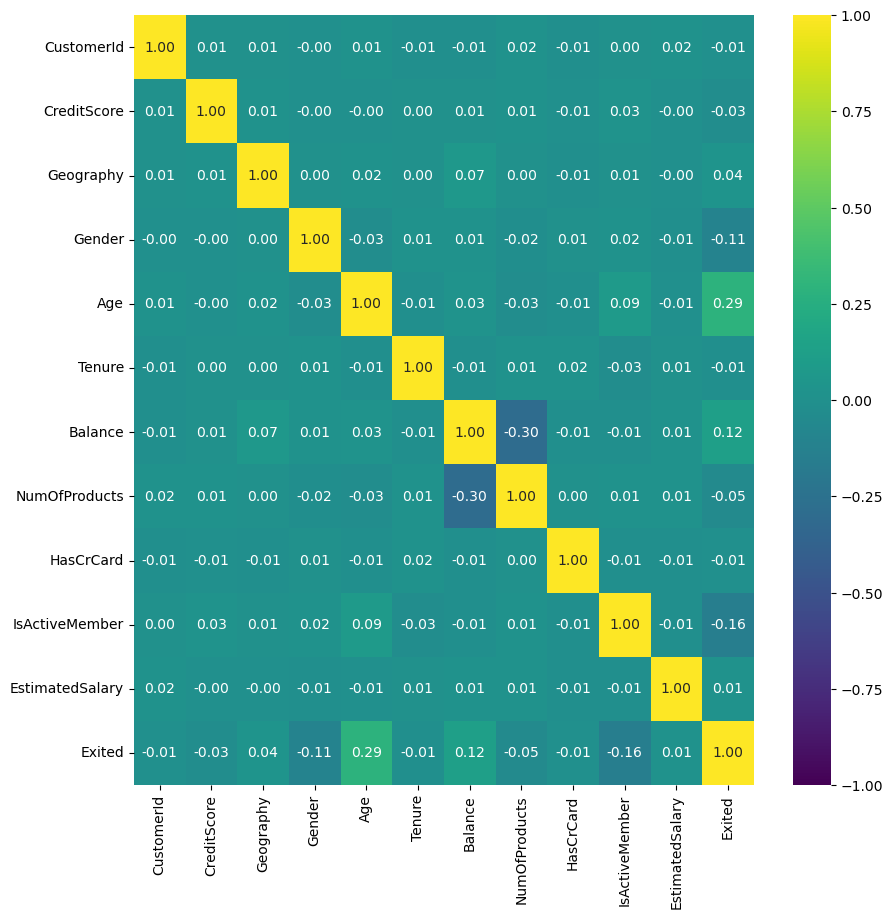

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,vmin=-1, vmax=1, fmt='.2f', cmap='viridis', center=0)

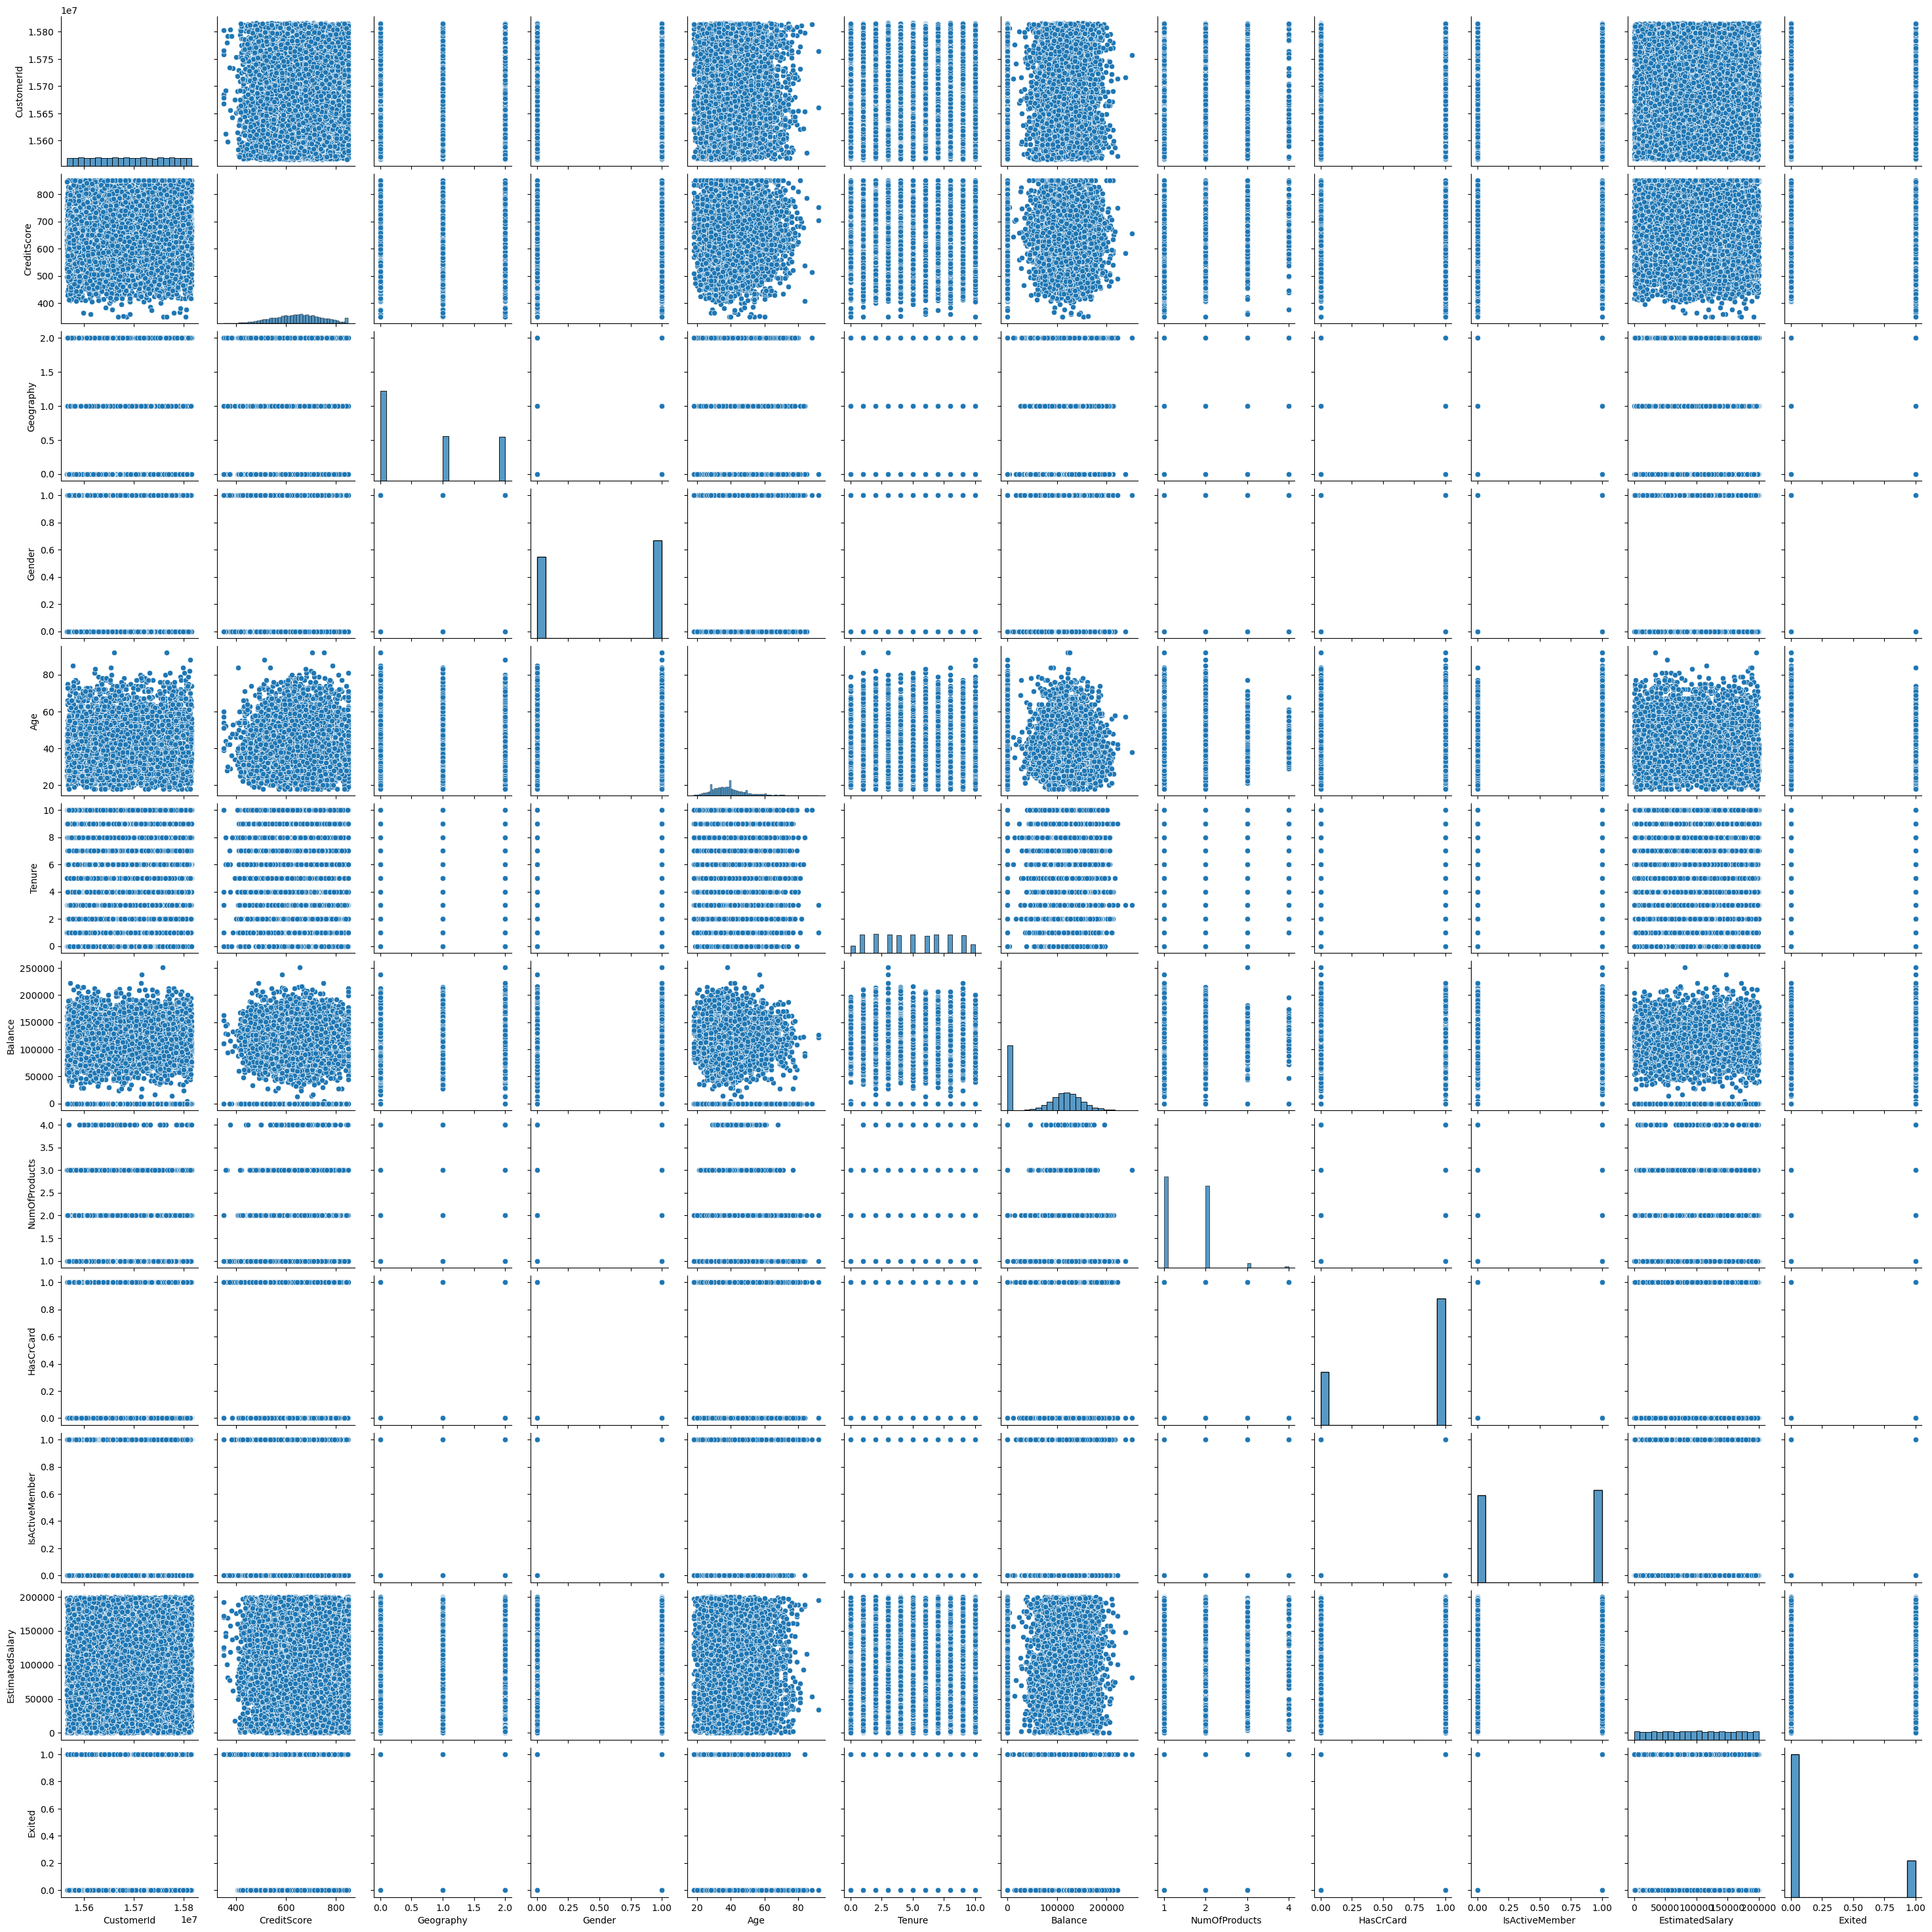

In [27]:
sns.pairplot(data)

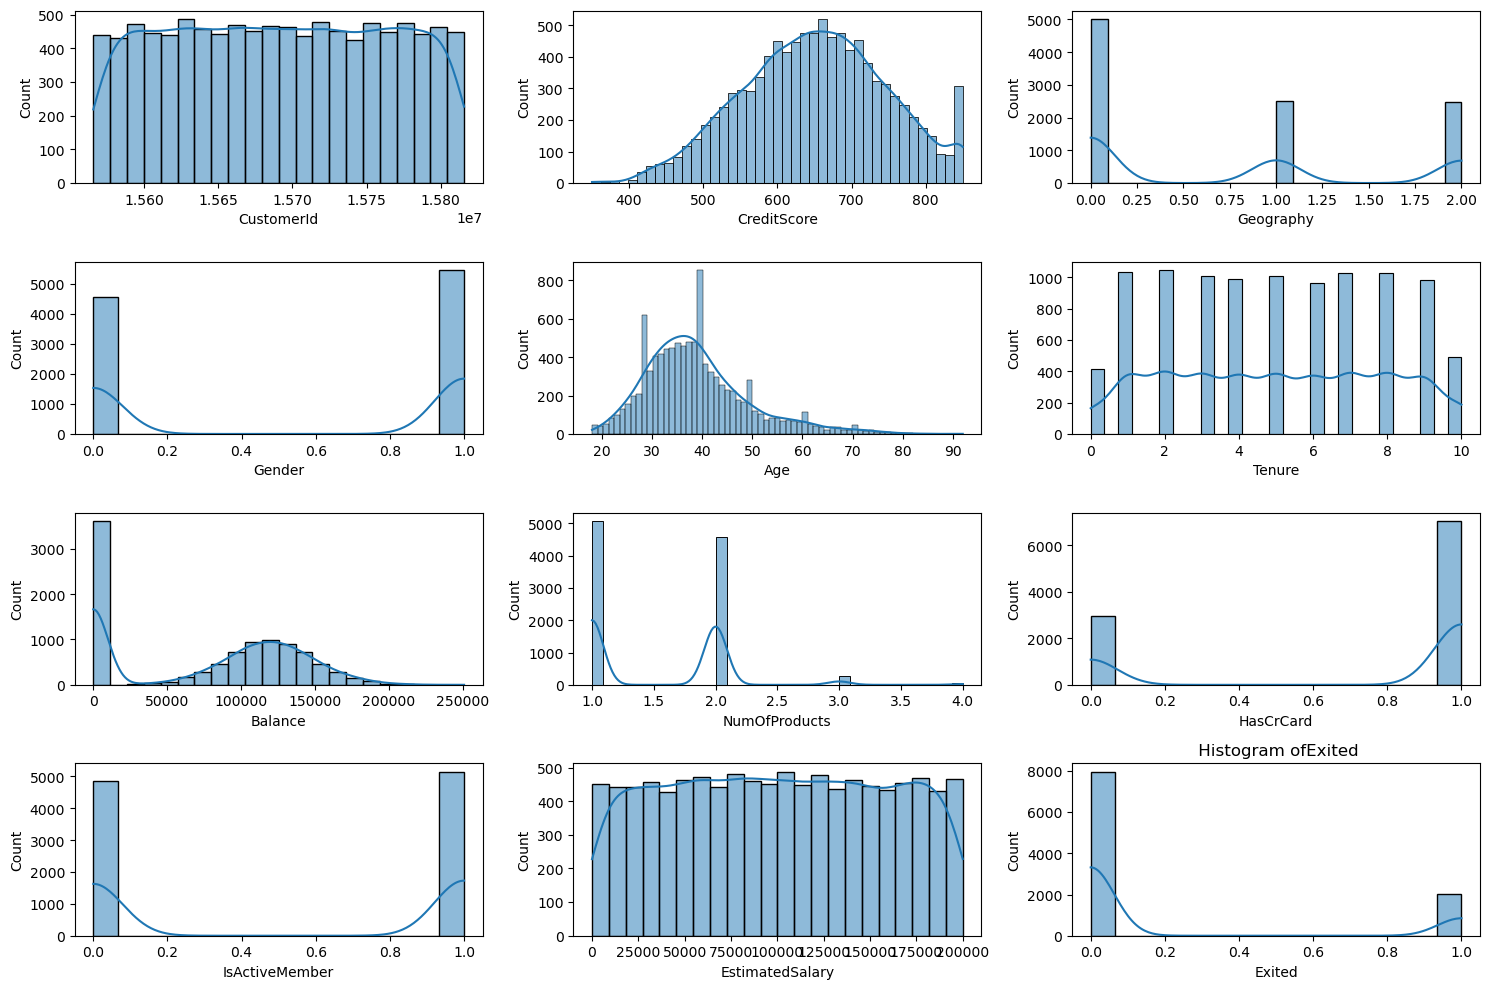

In [28]:
selected_column=data.columns

fig,axes=plt.subplots(nrows=4,ncols=3,figsize=(15,10))
axes=axes.flatten()

for i , column in enumerate(selected_column):
    sns.histplot(x=data[column],ax=axes[i],kde=True)
    plt.title(f" Histogram of{column}")
plt.tight_layout()

In [29]:
import scipy 

In [30]:
scipy.stats.skew(data)

array([ 1.14897352e-03, -7.15958668e-02,  5.00840701e-01, -1.83568370e-01,
        1.01116856e+00,  1.09898092e-02, -1.41087544e-01,  7.45456048e-01,
       -9.01676318e-01, -6.04275625e-02,  2.08504484e-03,  1.47138991e+00])

C:\Users\MODASUD\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



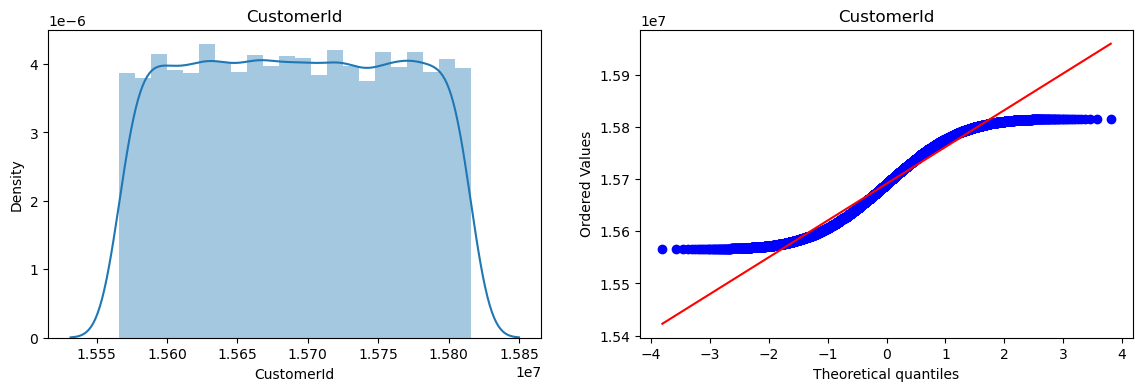

C:\Users\MODASUD\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



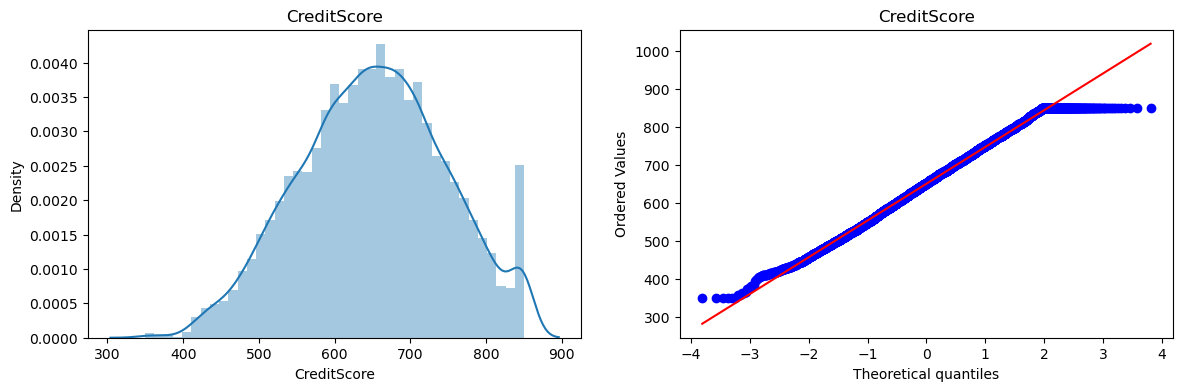

C:\Users\MODASUD\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



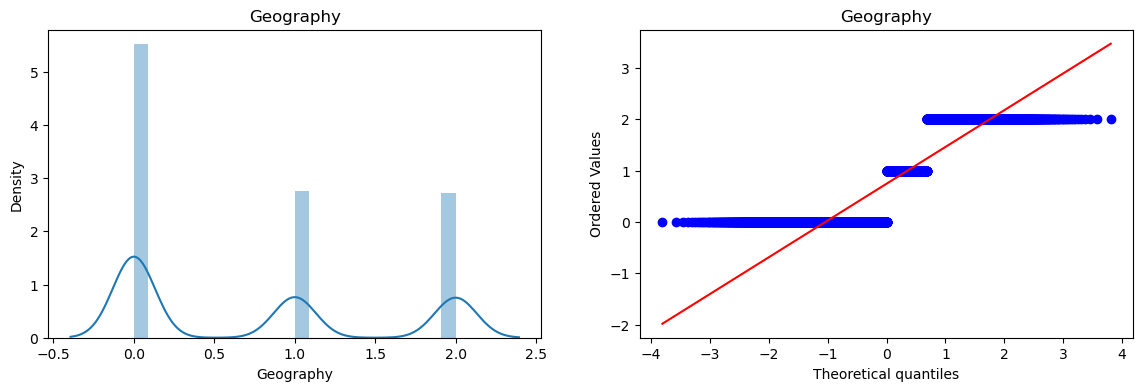

C:\Users\MODASUD\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



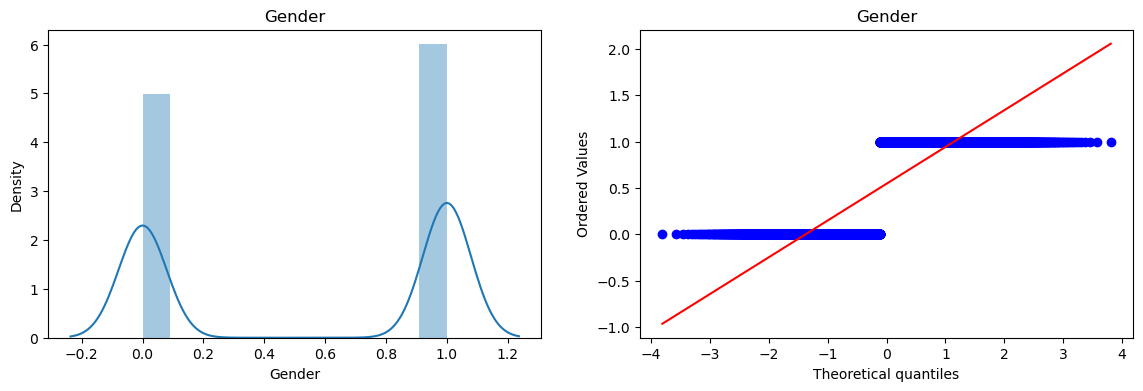

C:\Users\MODASUD\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



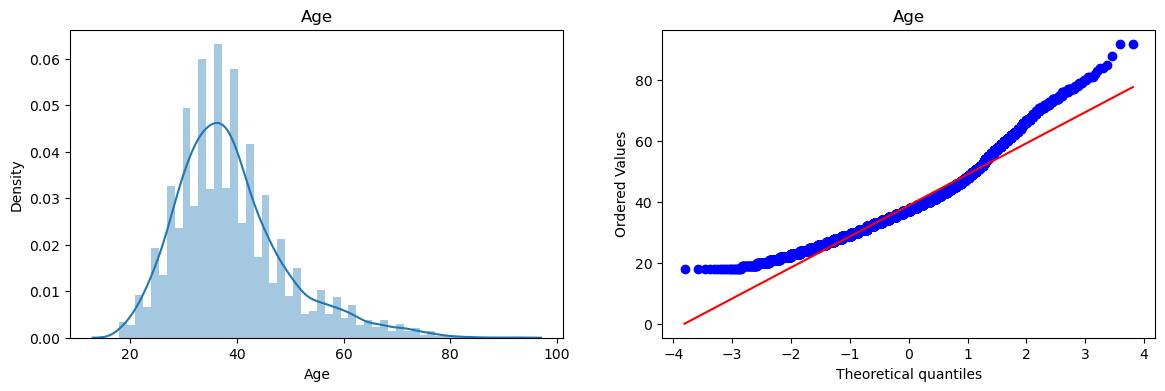

C:\Users\MODASUD\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



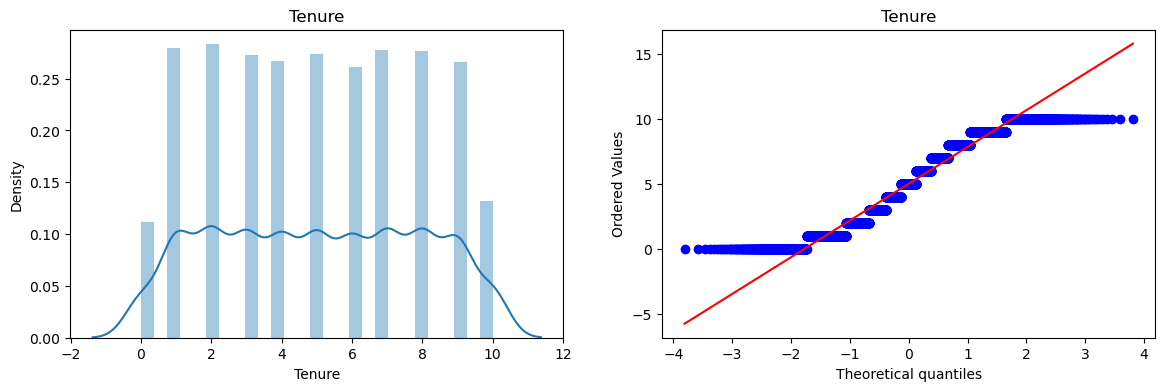

C:\Users\MODASUD\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



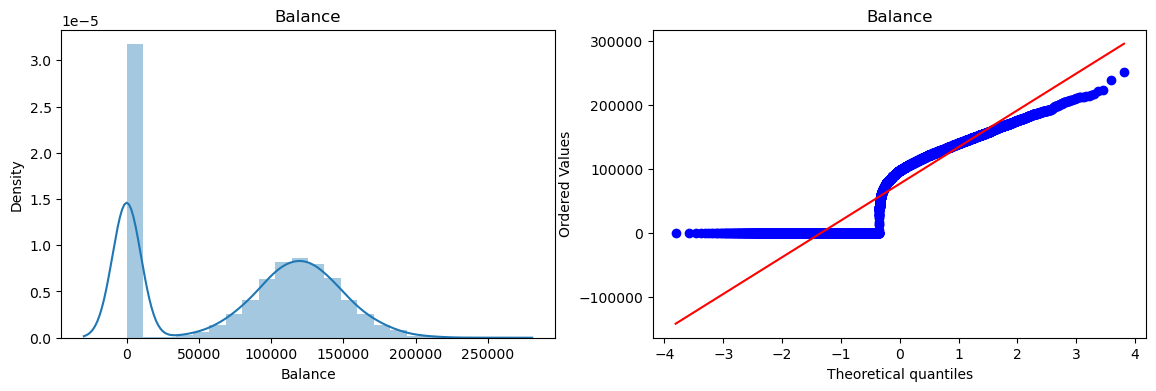

C:\Users\MODASUD\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



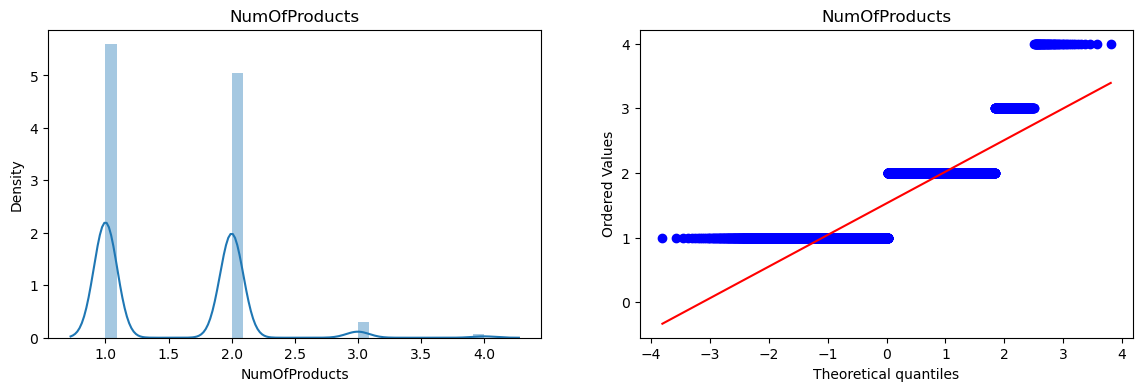

C:\Users\MODASUD\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



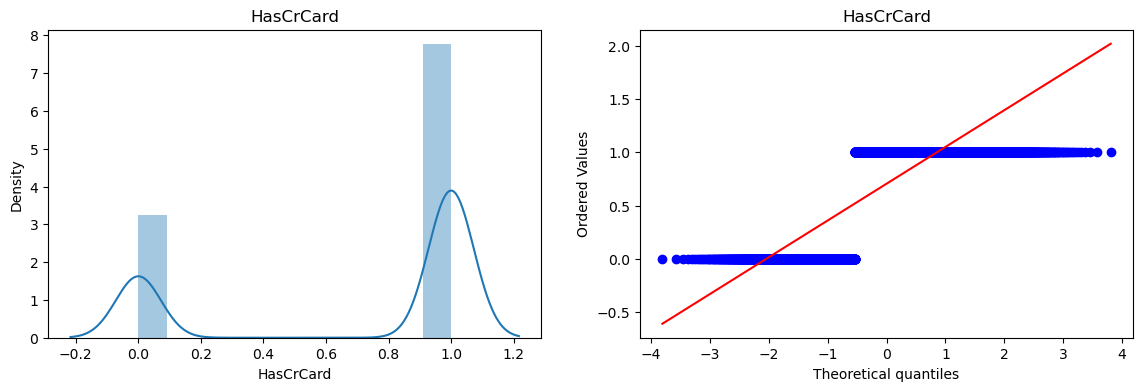

C:\Users\MODASUD\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



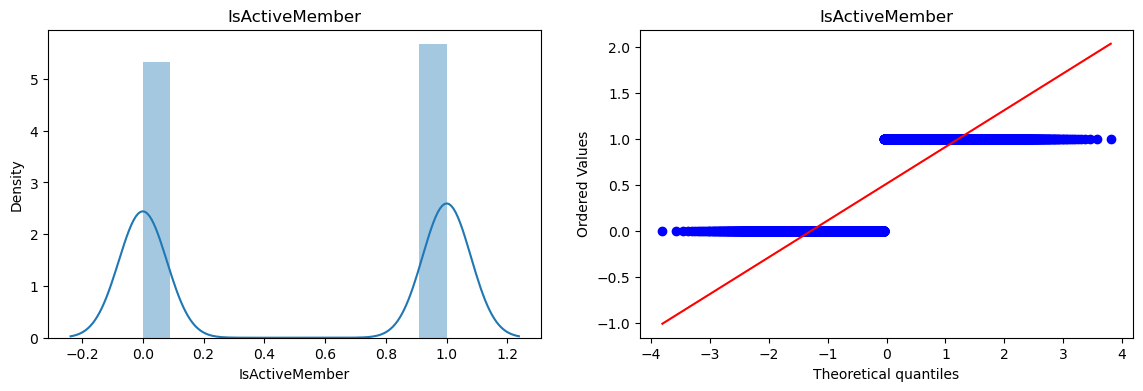

C:\Users\MODASUD\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



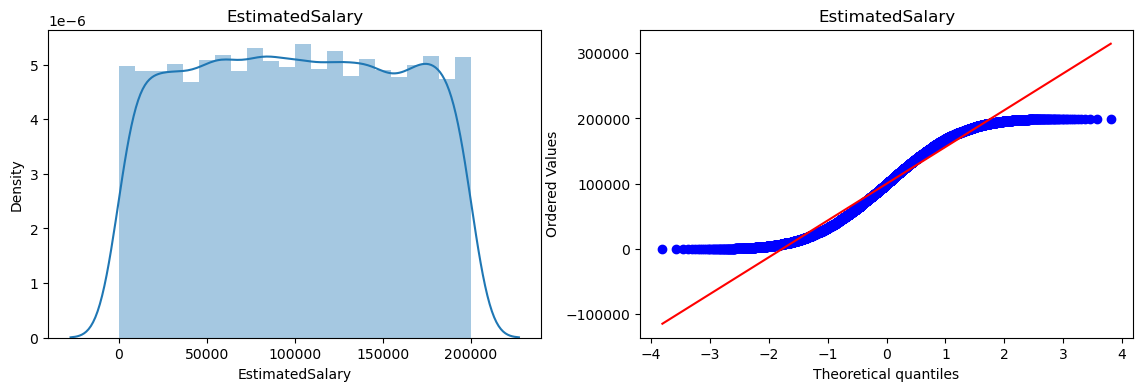

C:\Users\MODASUD\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



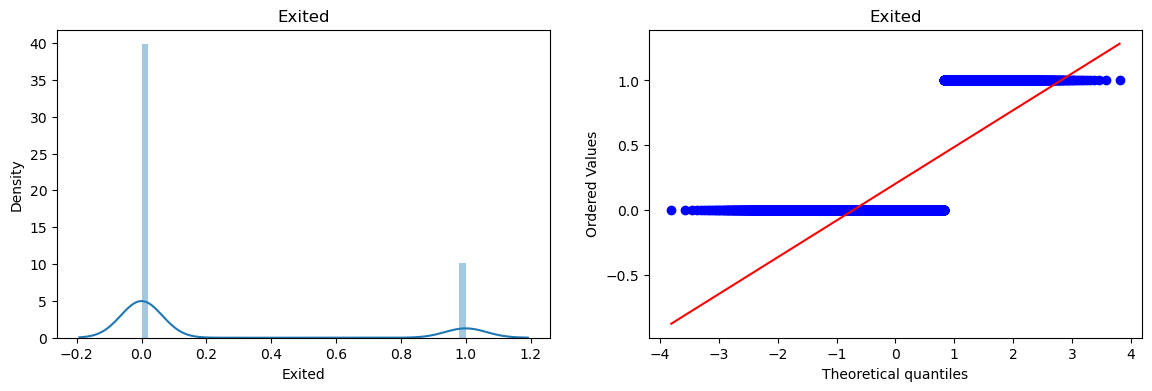

In [31]:
#Plotting the displot without transformation
import scipy.stats as stats
for col in data.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(data[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(data[col],dist="norm",plot=plt)
    plt.title(col)
    
    plt.show()

In [32]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [33]:
print(y.shape)
print(X.shape)

(10000,)
(10000, 11)


In [34]:
X.head()

CustomerId  CreditScore  Geography  Gender  Age  Tenure    Balance  \
0    15634602          619          0       0   42       2       0.00   
1    15647311          608          2       0   41       1   83807.86   
2    15619304          502          0       0   42       8  159660.80   
3    15701354          699          0       0   39       1       0.00   
4    15737888          850          2       0   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0              1          1               1        101348.88  
1              1          0               1        112542.58  
2              3          1               0        113931.57  
3              2          0               0         93826.63  
4              1          1               1         79084.10

In [35]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
log_data=LogisticRegression()

In [38]:
log_data.fit(X_train,y_train)

LogisticRegression()

In [39]:
predict=log_data.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [41]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

Predicted No  Predicted Yes
Actual No           1607              0
Actual Yes           393              0

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



C:\Users\MODASUD\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\MODASUD\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\MODASUD\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [44]:
log_data.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
from sklearn.utils import resample

# Up and Down sampling using the Sklearn

In [48]:
# Separate majority and minority classes
data_majority = data[data.Exited==0]
data_minority = data[data.Exited==1]

In [51]:
print(data_majority.shape)
print(data_minority.shape)

(7963, 12)
(2037, 12)


In [52]:
data_minority_upsampled = resample(data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=7963,    # to match majority class
                                 random_state=123) 

In [54]:
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

In [55]:
data_upsampled

CustomerId  CreditScore  Geography  Gender  Age  Tenure    Balance  \
1       15647311          608          2       0   41       1   83807.86   
3       15701354          699          0       0   39       1       0.00   
4       15737888          850          2       0   43       2  125510.82   
6       15592531          822          0       1   50       7       0.00   
8       15792365          501          0       1   44       4  142051.07   
...          ...          ...        ...     ...  ...     ...        ...   
3843    15677804          783          2       1   38       1       0.00   
2309    15621210          599          1       1   46       9  123444.72   
8396    15655082          607          0       0   48       4  112070.86   
5249    15804038          740          0       1   44       9       0.00   
8423    15706799          719          2       1   44       4       0.00   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
1                 1          0               1        112542.58       0  
3                 2          0               0         93826.63       0  
4                 1          1               1         79084.10       0  
6                 2          1               1         10062.80       0  
8                 2          0               1         74940.50       0  
...             ...        ...             ...              ...     ...  
3843              3          1               1         80178.54       1  
2309              1          1               1         31368.08       1  
8396              3          1               0        173568.30       1  
5249              1          0               1         96528.00       1  
8423              1          0               0         84972.90       1  

[15926 rows x 12 columns]

In [56]:
df_up=data_upsampled.sample(frac=1)

In [59]:
df_up['Exited'].value_counts()

0    7963
1    7963
Name: Exited, dtype: int64

In [60]:
df_up

CustomerId  CreditScore  Geography  Gender  Age  Tenure    Balance  \
1560    15634281          720          1       0   43      10  110822.90   
4537    15777436          710          2       0   31       5       0.00   
3975    15720071          535          0       0   49       3       0.00   
9694    15659710          581          0       1   25       5   77886.53   
7246    15728010          485          0       1   37       5       0.00   
...          ...          ...        ...     ...  ...     ...        ...   
3587    15599410          721          0       1   41       2       0.00   
2003    15799350          632          0       1   41       0  106134.46   
8611    15617029          596          2       0   30       1       0.00   
2161    15569678          561          1       1   32       6  166824.59   
5442    15660417          613          1       0   43      10  120481.69   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
1560              1          0               0         72861.94       0  
4537              2          1               0          9561.73       0  
3975              1          0               0         61820.41       1  
9694              2          1               0        150319.49       0  
7246              2          0               1        170226.47       0  
...             ...        ...             ...              ...     ...  
3587              2          1               0        168219.75       0  
2003              1          0               1        105570.39       0  
8611              2          1               0          8125.39       0  
2161              1          1               0        139451.98       0  
5442              1          0               0         94875.03       1  

[15926 rows x 12 columns]

In [61]:
X=df_up.iloc[:,:-1]
y=df_up.iloc[:,-1]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
log_data1=LogisticRegression()

In [64]:
log_data1.fit(X_train,y_train)

LogisticRegression()

In [65]:
predict1=log_data1.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [68]:
pd.DataFrame(confusion_matrix(y_test,predict1),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

Predicted No  Predicted Yes
Actual No            773            822
Actual Yes           512           1079

In [70]:
print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

           0       0.60      0.48      0.54      1595
           1       0.57      0.68      0.62      1591

    accuracy                           0.58      3186
   macro avg       0.58      0.58      0.58      3186
weighted avg       0.58      0.58      0.58      3186

